In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:
# get input image
I = cv2.imread("cat.png",cv2.IMREAD_GRAYSCALE)

In [5]:
# Question 1: Write a function that performs contrast stretching. Read the given gray-scale
# image and apply your function to test whether it indeed improves the image quality.

In [6]:
def Contrast_Stretching(I):
    a = 0
    b = 255
    c = np.min(I)
    d = np.max(I)
    O = ((I - c)*((b-a)/(d-c)))+a
    return O

In [7]:
O = Contrast_Stretching(I)

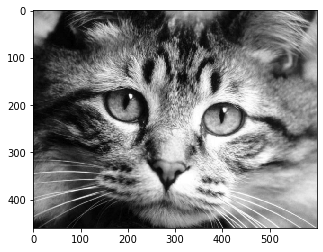

In [8]:
plt.imshow(O,'gray')

In [9]:
# Question 2: Write a function that computes and plots the histogram of the given image

In [10]:
def Histogram(I):
    hist = cv2.calcHist([I],[0],None,[256],[0,256])
    plt.plot(hist)

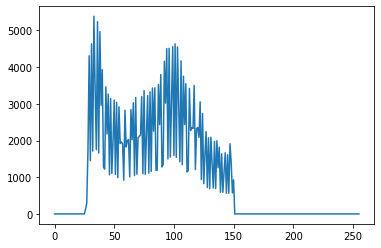

In [11]:
Histogram(I)

In [12]:
# Question 3: Write a function that computes the two gradient images 𝜕𝐼/𝜕𝑥 ≈ 𝐼 ∗ 𝑆𝑥 and
# 𝜕𝐼/𝜕𝑦 ≈ 𝐼 ∗ 𝑆𝑦 from the given image.

In [13]:
#  both vertical and horizon here
def Image_Edges(I):
    Sobel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    Sobel_y = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
   
    width, height = I.shape
    img = np.zeros(I.shape)
    for i in range(width-2):
        for j in range(height-2):
#           here is the result with the vertical Sobel filter
            Gx = abs(np.sum(I[i:i+3, j:j+3] * Sobel_x))
#           here is the result with the horizon Sobel filter
            Gy = abs(np.sum(I[i:i+3, j:j+3] * Sobel_y))
#           here is the new image I got after convolution
            img[i+1, j+1] = 0.5*Gx + 0.5*Gy
#   change the numpy to the type of uint8
    result = np.uint8(img)
    plt.imshow(result,'gray')


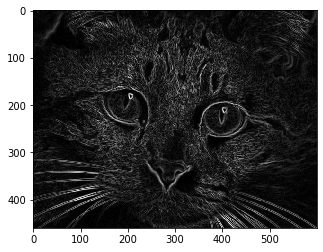

In [14]:
Image_Edges(I)

In [15]:
# 𝜕𝐼/𝜕𝑥 ≈ 𝐼 ∗ 𝑆𝑥
def vertical(I):
    Sobel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    width,height = I.shape
    Gx = np.zeros(I.shape)
    for i in range(0, width - 2):
        for j in range(0, height - 2):
            v = abs(np.sum(I[i:i+3, j:j+3] * Sobel_x))  # vertical here
            Gx[i+1, j+1] = v
    Gx = np.uint8(Gx)
#     print(Gx)
    plt.imshow(Gx,'gray')

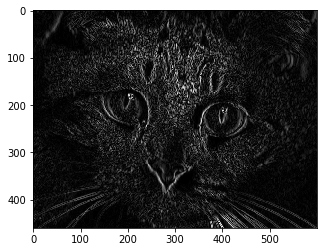

In [16]:
vertical(I)

In [17]:
# 𝜕𝐼/𝜕𝑦 ≈ 𝐼 ∗ 𝑆𝑦
def horizon(I):
    Sobel_y = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
    width,height = I.shape
    Gy = np.zeros(I.shape)
    for i in range(0, width - 2):
        for j in range(0, height - 2):
            h = abs(np.sum(I[i:i+3, j:j+3] * Sobel_y))  # vertical here
            Gy[i+1, j+1] = h
    Gy = np.uint8(Gy)
#     print(Gx)
    plt.imshow(Gy,'gray')

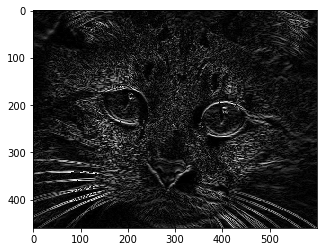

In [18]:
horizon(I)

In [19]:
# the sobel operator in opencv here to verify the result of your own functions
sobelx=cv2.Sobel(I,cv2.CV_64F, 1, 0, ksize=3)
sobelx=cv2.convertScaleAbs(sobelx)
sobely=cv2.Sobel(I,cv2.CV_64F, 0, 1, ksize=3)
sobely=cv2.convertScaleAbs(sobely)
output=cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

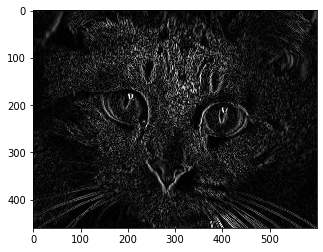

In [20]:
plt.imshow(sobelx,'gray')

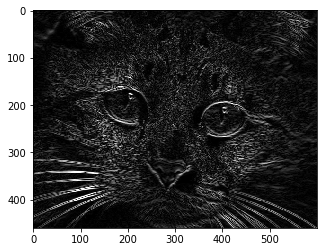

In [21]:
plt.imshow(sobely,'gray')

In [22]:
# Question 4 (2.5 marks): Write a function that implements the above technique. Apply it to
# the given image using, for example, 𝜎 = 1.0 pixels and 𝑎 = 1.25. The differences between 𝐼
# and 𝑂 are subtle but the latter should be visibly sharper

In [23]:
def image_sharpening(I,sigma,a):
# set ksize as zero, then it can be automatically calculated by sigma
    L = cv2.GaussianBlur(I,(0,0),sigma)
# H = I - L
    H = cv2.subtract(I,L)
# O = I + a * H
    O = cv2.add(I,a*H)
#  apply contrast stretching in Q1 to force the contrast in 𝐼 and 𝑂 to be in the same range [0,255]
    O = Contrast_Stretching(O)
    plt.imshow(O,'gray')
    cv2.imwrite("Q4.png",O)

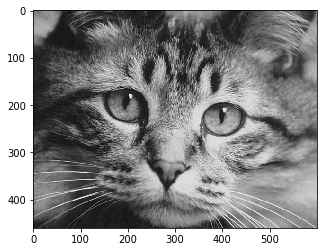

In [24]:
# apply contrast stretching in Q1 to force the contrast in 𝐼 and 𝑂 to be in the same range [0,255]
I_q4 = Contrast_Stretching(I)
# Q4_input.png is the input image in Q4 which in the range [0,255]
cv2.imwrite("Q4_input.png",I_q4)
image_sharpening(I_q4,1,1.25)

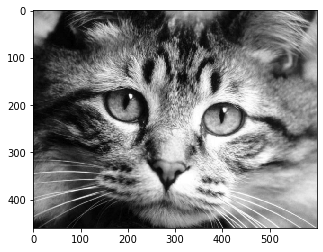

In [25]:
plt.imshow(I_q4,'gray')